# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Adam Chang\
**Email:** yc4633@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [ ]:
Problem 1: Dataset Splitting

(1) Generalization to new speakers

  Do a speaker-independent split:

  Train: 70 speakers

  Validation: 15 speakers

  Test: 15 speakers

  Assign all recordings of a person (all 5 days, all phones) to exactly one of {train, val, test}.

  This guarantees that validation/test performance reflects generalization to new speakers, not memorization of speakers in training.

(2) Extra 10,000 phones from Kilian

  I’d use two evaluation slices: one for generalization and one for personalization to Kilian.

  Keep a speaker-independent split for the multi-speaker data (as above):

  Train_multi, Val_multi, Test_multi (all non-Kilian speakers).

  Split Kilian’s data separately:

  Train_K: around 60–70% of Kilian’s phones.

  Val_K: around 10–20%.

  Test_K: remaining 20–30%.

  Training strategy (one reasonable approach):

    Step 1: Train a base model on Train_multi (speaker-general model).

    Step 2: Fine-tune on a mixture of Train_multi + Train_K, or fine-tune only on Train_K but:

Use Val_multi to ensure you don’t destroy generalization.

Use Val_K to tune Kilian-specific performance.

Evaluation:

Report:

Generalization: accuracy on Test_multi (new unseen speakers).

Kilian-specific: accuracy on Test_K.

This gives me a speaker-general model that is then adapted to Kilian without contaminating the “new speaker” test set with his data.

SyntaxError: invalid character '’' (U+2019) (ipython-input-3311218244.py, line 19)

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


In [ ]:
(1) 1-NN decision boundary (first dataset)

Positive: (1,2), (1,4), (5,4)
Negative: (3,1), (3,2)

The 1-NN decision regions form a Voronoi diagram around these 5 points.

The decision boundary is made of perpendicular bisectors between neighboring points of different labels:

e.g., between (1,2) and (3,1), between (1,2) and (3,2), etc.

Any new point is classified by whichever of the 5 points is closest in Euclidean distance.
(So the plane is partitioned into 5 cells; 3 positive cells, 2 negative cells.)

(Since you didn’t specify any particular new points, the answer is: classify each new point by the label of its nearest of those 5 points — geometrically, that’s the Voronoi partition.)

(2) Effect of feature scaling

Dataset:

Positive: (100,2), (100,4), (500,4)

Negative: (300,1), (300,2)

Query:
q=(500,1)

Before scaling:

Distances squared from
q to each point:

To (100,2):
160001

To (100,4):
160009
400
2
+(1−4)
2
=160000+9=160009

To (500,4):
9

To (300,1):
40000

To (300,2):

40001

  Nearest neighbor: (500,4) = Positive.

  After scaling each feature to [0,1] (using min/max from the training set):

  For feature 1 (x): min = 100, max = 500 → divide by 400.

  For feature 2 (y): min = 1, max = 4 → divide by 3.

  Scaled coordinates (x', y'):

  (100,2) → (0.0, 1/3)

  (100,4) → (0.0, 1.0)

  (500,4) → (1.0, 1.0)

  (300,1) → (0.5, 0.0)

  (300,2) → (0.5, 1/3)

  Query (500,1) → (1.0, 0.0)

  Distances squared from q'=(1,0):

To (0.0,1/3):

1.11

To (0.0,1.0):

2

To (1.0,1.0):
1

To (0.5,0.0):
0.25

To (0.5,1/3):

0.36

Nearest neighbor: (300,1) = Negative.


Before scaling: classified as Positive.

After scaling: classified as Negative.
(3) Handling missing features in K-NN

For a test point with some missing coordinates:

I would compute the distance using only the dimensions that are present in both the test point and the training point.

Something else I could try would be to normalize this distance by the fraction of dimensions used so it’s comparable between neighbors.

Alternatively (or additionally), impute missing values (e.g., using feature means, medians, or K-NN imputation) before running K-NN.

TLDR: modify the distance function to ignore missing features (and renormalize) or impute them first.
(4) Why can K-NN still work for images?

Even though images have thousands of pixels:

Real images lie on a much lower-dimensional manifold (strong structure, local correlations).

Similar images tend to be close in pixel or feature space, especially after preprocessing (e.g., normalization, PCA) or when using feature embeddings from a CNN instead of raw pixels.

With enough data, and a sensible distance metric / feature representation, K-NN can still find meaningful nearest neighbors.

So K-NN works well on images mainly because we don’t use the raw, arbitrary high-dimensional space; we exploit its structured, low-dimensional nature (often via learned features).

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [ ]:
Problem 3: Perceptron – Theory (Part 1)


If we compute predictions h(x) on both D_TR and DTE and compare them to the true labels
𝑦 we can count misclassifications and estimate:

Training error and Test error

Comparing these gives  whether empirical test error is higher than empirical training error.


(2)
The algorithm updates 𝑤 only when it misclassifies a training example.

When it stops updating, this means no training point is misclassified and the training error is 0 by construction at convergence.

So, in the separable setting, we already know the training error without computing it explicitly as zero

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [1]:
import numpy as np

# Data: [positive, negative]
X = np.array([[10, -2],
              [12,  2]])
y = np.array([+1, -1])

def perceptron(X, y, lr=1.0, max_epochs=100):
    w = np.zeros(X.shape[1], dtype=float)
    history = [w.copy()]
    updates = 0

    for epoch in range(max_epochs):
        changed = False
        for i in range(len(X)):
            if y[i] * np.dot(w, X[i]) <= 0:
                # update
                w = w + lr * y[i] * X[i]
                updates += 1
                history.append(w.copy())
                changed = True
        if not changed:
            break  # converged

    return w, updates, history

w_final, num_updates, weight_history = perceptron(X, y)

print("Final w:", w_final)
print("Number of updates:", num_updates)
print("Sequence of w_i:")
for i, w in enumerate(weight_history):
    print(f"w_{i} = {w}")


Final w: [  2. -18.]
Number of updates: 9
Sequence of w_i:
w_0 = [0. 0.]
w_1 = [10. -2.]
w_2 = [-2. -4.]
w_3 = [ 8. -6.]
w_4 = [-4. -8.]
w_5 = [  6. -10.]
w_6 = [ -6. -12.]
w_7 = [  4. -14.]
w_8 = [ -8. -16.]
w_9 = [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [ ]:
w0 = (0,0,0,0,0)
add 2 (0,0,0,0,4) = (0,0,0,0,8)
add (0,0,6,5,0) = (0,0,6,5,8)
add (-3,0,0,0,0) = (-3,0,6,5,8)
add (0,-9,-3,-6,0) = (-3,-9,3,-1,8)
add (0,-1,0,-2,-5) = (-3,-10,3,-3,-3)
final w = (-3,-10,3,-3,-3)


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

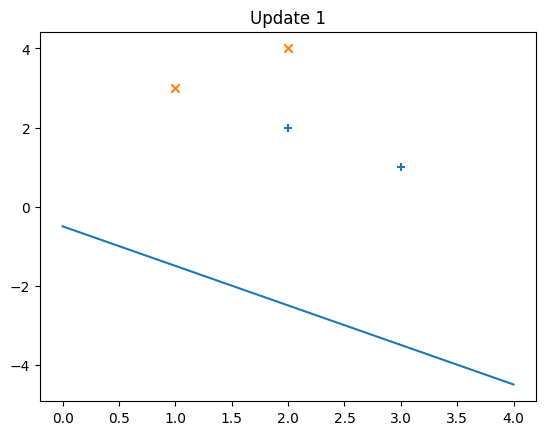

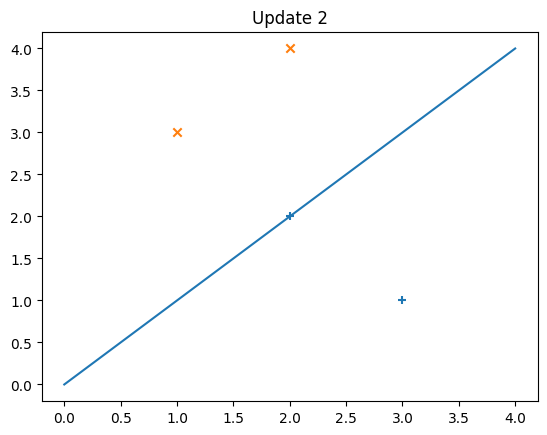

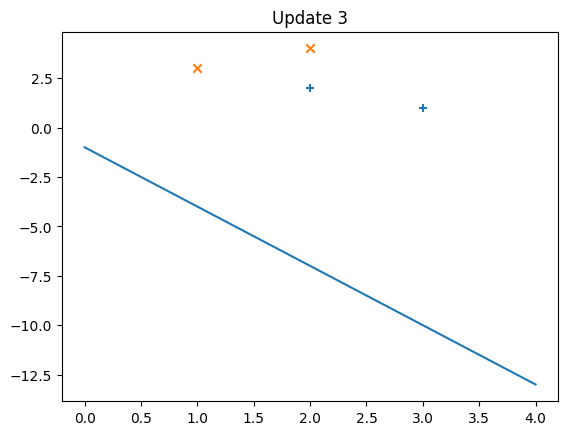

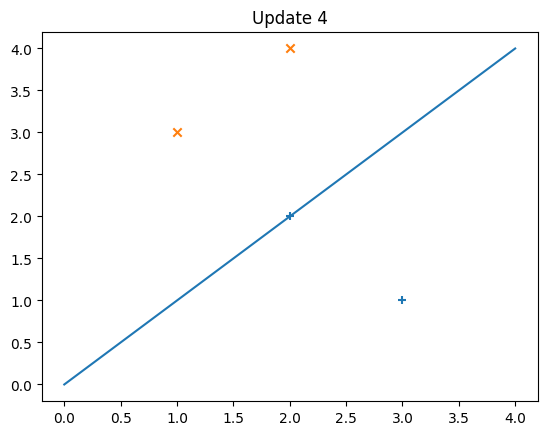

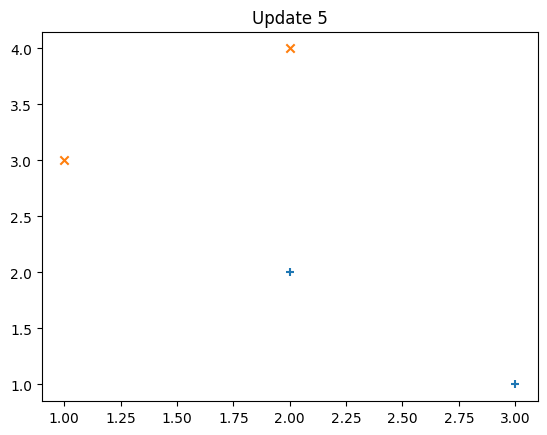

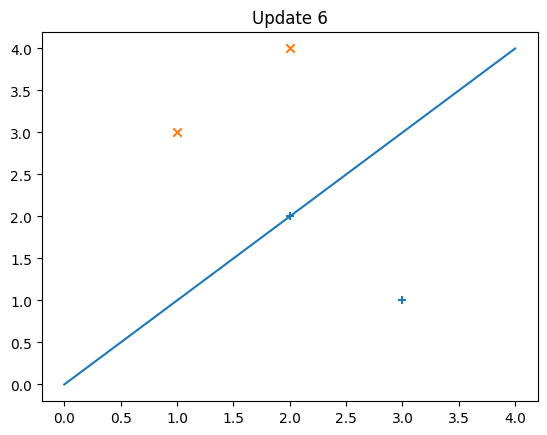

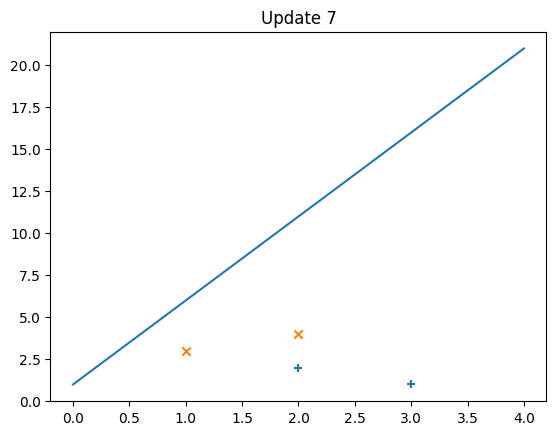

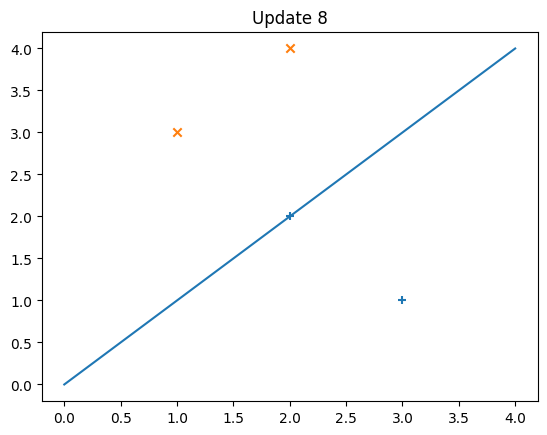

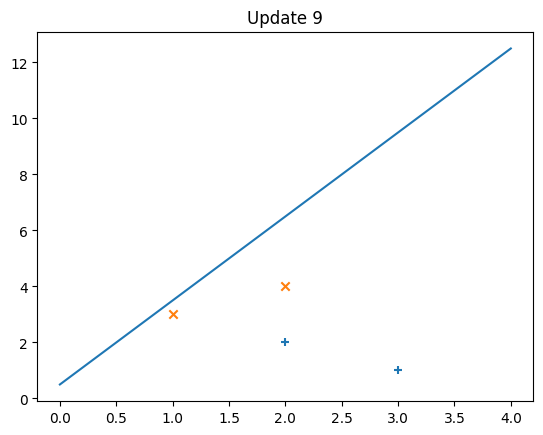

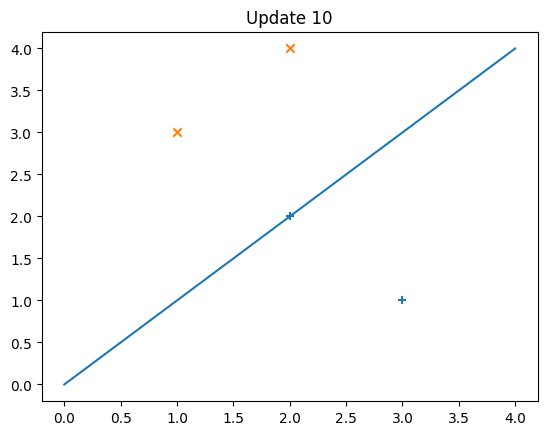

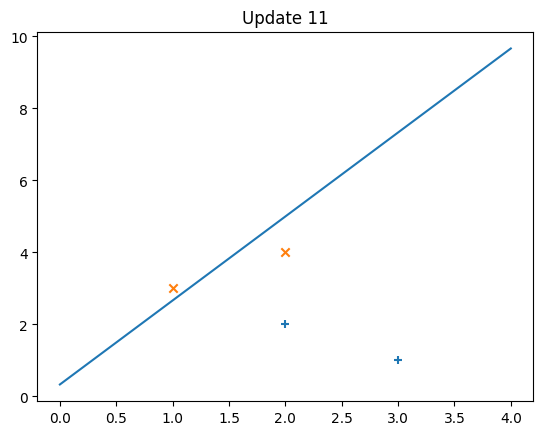

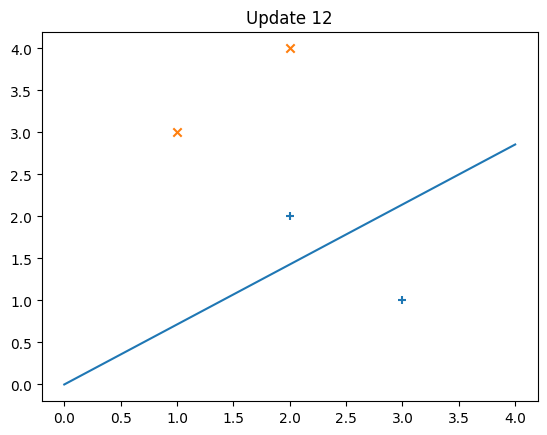

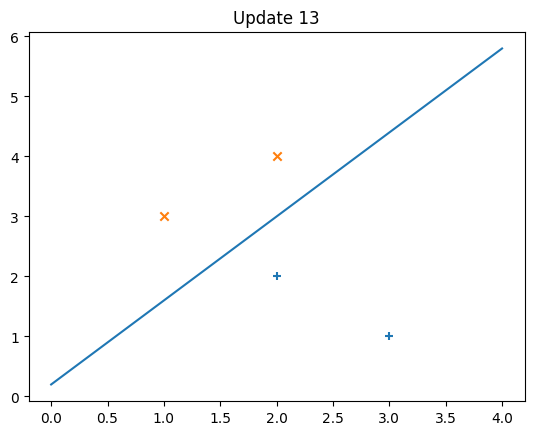

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2,2], [3,1], [1,3], [2,4]])
y = np.array([+1, +1, -1, -1])

w = np.zeros(2)
b = 0.0
eta = 1.0

def plot_data_and_boundary(w, b, title=""):
    # scatter points
    pos = y == 1
    neg = y == -1
    plt.scatter(X[pos,0], X[pos,1], marker='+')
    plt.scatter(X[neg,0], X[neg,1], marker='x')
    # decision boundary: w1 x + w2 y + b = 0  →  y = -(w1/w2)x - b/w2
    if w[1] != 0:
        xs = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
        ys = -(w[0]*xs + b) / w[1]
        plt.plot(xs, ys)
    plt.title(title)
    plt.show()

changed = True
iteration = 0
while changed:
    changed = False
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            w = w + eta * y[i] * X[i]
            b = b + eta * y[i]
            iteration += 1
            plot_data_and_boundary(w, b, title=f"Update {iteration}")
            changed = True
